In [1]:
% matplotlib inline

import time
import pandas as pd

from IPython import display as d

import seaborn as sns
sns.set()

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE

from libs import container
from libs.experiment import (
    WithAnotherExperiment, KFoldExperiment, roc, 
    discretize_classes, clean_features)

In [2]:
data = container.Container(sample=pd.read_pickle("data/sample.pkl"))
data["balanced"] = pd.concat((
    data.sample[data.sample.nbg == 1].sample(786),
    data.sample[data.sample.nbg == 0]))
data["small_sample"] = pd.read_pickle("data/small_sample.pkl")

## Features cleaning

In [3]:
sclasses = {
    "nbg": 1,
    "no-nbg": 0}
sclasses

{'nbg': 1, 'no-nbg': 0}

In [4]:
data.sample.shape, data.balanced.shape, data.small_sample.shape

((12598, 161), (1572, 161), (4352, 161))

In [5]:
X_columns = clean_features(data, "sample")
X_columns = X_columns[
    ~(X_columns.str.contains("Freq2_") | X_columns.str.contains("Freq3_"))]
print("Total features:", X_columns.size)

Removing [] because null
Removing ['src1_Freq1_harmonics_rel_phase_0', 'src1_Freq2_harmonics_rel_phase_0', 'src1_Freq3_harmonics_rel_phase_0', 'src2_Freq1_harmonics_rel_phase_0', 'src2_Freq2_harmonics_rel_phase_0', 'src2_Freq3_harmonics_rel_phase_0'] because lowvariance
('Total features:', 114)


In [6]:
set(x.split("_", 1)[-1] for x in X_columns)

{'Amplitude',
 'AmplitudeH',
 'AmplitudeJ',
 'AmplitudeJH',
 'AmplitudeJK',
 'Autocor_length',
 'Beyond1Std',
 'CAR_mean',
 'CAR_sigma',
 'CAR_tau',
 'Con',
 'Eta_e',
 'FluxPercentileRatioMid20',
 'FluxPercentileRatioMid35',
 'FluxPercentileRatioMid50',
 'FluxPercentileRatioMid65',
 'FluxPercentileRatioMid80',
 'Freq1_harmonics_amplitude_0',
 'Freq1_harmonics_amplitude_1',
 'Freq1_harmonics_amplitude_2',
 'Freq1_harmonics_amplitude_3',
 'Freq1_harmonics_rel_phase_1',
 'Freq1_harmonics_rel_phase_2',
 'Freq1_harmonics_rel_phase_3',
 'Gskew',
 'LinearTrend',
 'MaxSlope',
 'Mean',
 'Meanvariance',
 'MedianAbsDev',
 'MedianBRP',
 'PairSlopeTrend',
 'PercentAmplitude',
 'PercentDifferenceFluxPercentile',
 'PeriodLS',
 'Period_fit',
 'Psi_CS',
 'Psi_eta',
 'Q31',
 'Rcs',
 'Skew',
 'SmallKurtosis',
 'Std',
 'c89_c3',
 'c89_hk_color',
 'c89_jh_color',
 'c89_jk_color',
 'c89_m2',
 'c89_m4',
 'cnt',
 'n09_c3',
 'n09_hk_color',
 'n09_jh_color',
 'n09_jk_color',
 'n09_m2',
 'n09_m4',
 'ppmb'}

## SVM - Linear

In [7]:
%%time
svc_linear = KFoldExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses,
    data=data, pcls="nbg", ncls="no-nbg", sampler=SMOTE(),
    X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[qMpcQaTpTibGcGJHnbEeah-2018-10-12 16:02:08.853242] Launching
[UnNZY2B2jMax9XLmeG9Mu6-2018-10-12 16:02:09.245554] Launching
[xt87Pr9DnV3beZygJcgpH8-2018-10-12 16:02:09.630296] Launching
[2rQu6i6Rt6bJNyEbt4wKj6-2018-10-12 16:02:10.020305] Launching
[avWb7BNVj7fi5SXKUakLQF-2018-10-12 16:02:10.423501] Launching
[JgKBetFU8oNthUad9DXpef-2018-10-12 16:02:10.835804] Launching
[8zKAWQRpof2WvX4DREyv3j-2018-10-12 16:02:11.261148] Launching
[i3coK6gu3Rrm4AHprkfctH-2018-10-12 16:02:11.702482] Launching
[8hSd89fSqZKRNSEAPnzJMR-2018-10-12 16:02:12.165499] Launching
[x43KRbCG7qpQdXbfqfZpAN-2018-10-12 16:02:12.658476] Launching
[x43KRbCG7qpQdXbfqfZpAN-2018-10-12 16:06:56.732536] Done
[UnNZY2B2jMax9XLmeG9Mu6-2018-10-12 16:08:14.533578] Done
[JgKBetFU8oNthUad9DXpef-2018-10-12 16:08:24.075711] Done
[i3coK6gu3Rrm4AHprkfctH-2018-10-12 16:08:59.058097] Done
[avWb7BNVj7fi5SXKUakLQF-2018-10-12 16:09:08.795821] Done
[xt87Pr9DnV3beZygJcgpH8-2018-10-12 16:09:14.075443] Done
[2rQu6i6Rt6bJNyEbt4wKj6-2018-10-12 16:

## SVM - Poly

In [8]:
%%time
svc_poly = KFoldExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses,
    data=data, pcls="nbg", ncls="no-nbg", sampler=SMOTE(),
    X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[9pRFpXkRPqbdqFNzf9qWgg-2018-10-12 16:09:36.648790] Launching
[Qgz7mcPmbBjHXpuoFMEgmb-2018-10-12 16:09:37.019617] Launching
[XNnZZvhmF78mnmx8DUth2T-2018-10-12 16:09:37.391013] Launching
[kU9aNCvCRjXzSKzdBaLVo7-2018-10-12 16:09:37.766104] Launching
[6q4aa3etYbKiNU3Hs3ZpXi-2018-10-12 16:09:38.095557] Launching
[YJfejtXNJgGWbQimeZQd3h-2018-10-12 16:09:38.433225] Launching
[g7LYhqSYeQN5hqq52NuqRZ-2018-10-12 16:09:38.779494] Launching
[aVKwnuncfdz4ecNp6GGEiQ-2018-10-12 16:09:39.126782] Launching
[duJfBhxfdigs427wkZV2PH-2018-10-12 16:09:39.488481] Launching
[S8uCnwZZBEQZHVQq3SoqEa-2018-10-12 16:09:39.977429] Launching
[YJfejtXNJgGWbQimeZQd3h-2018-10-12 16:11:06.434162] Done
[XNnZZvhmF78mnmx8DUth2T-2018-10-12 16:11:16.140997] Done
[aVKwnuncfdz4ecNp6GGEiQ-2018-10-12 16:11:31.085245] Done
[duJfBhxfdigs427wkZV2PH-2018-10-12 16:11:33.570115] Done
[Qgz7mcPmbBjHXpuoFMEgmb-2018-10-12 16:11:41.449087] Done
[S8uCnwZZBEQZHVQq3SoqEa-2018-10-12 16:11:50.043001] Done
[9pRFpXkRPqbdqFNzf9qWgg-2018-10-12 16:

## Random Forest

In [9]:
%%time
rf = KFoldExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), clsnum=sclasses, sampler=SMOTE(),
    data=data, pcls="nbg", ncls="no-nbg", X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[rra9Csww7xt9guncumKhfQ-2018-10-12 16:11:57.924692] Launching
[wDM86nzqoW7H3i4eWT3niW-2018-10-12 16:11:58.272388] Launching
[woWnCn35MjwUvivk4nvZ6V-2018-10-12 16:11:58.594040] Launching
[5ZGDGAZnQeb6iSP28Wuagf-2018-10-12 16:11:58.918290] Launching
[2LT8b568ssDZBKwDT3D6qP-2018-10-12 16:11:59.244809] Launching
[27pU2AyKVcSjMyhKizqeFi-2018-10-12 16:11:59.573180] Launching
[ay9ZTcU49YL3abnvGNF69m-2018-10-12 16:11:59.895170] Launching
[mg6V25gbeEpEXA2HEMn4ZU-2018-10-12 16:12:00.219575] Launching
[FGCDBfF4fpfu2YBWkLQeEE-2018-10-12 16:12:00.544676] Launching
[vCRQd4uy8jYkAhiasYxA3i-2018-10-12 16:12:00.864784] Launching
[vCRQd4uy8jYkAhiasYxA3i-2018-10-12 16:14:08.550795] Done
[27pU2AyKVcSjMyhKizqeFi-2018-10-12 16:14:12.423579] Done
[FGCDBfF4fpfu2YBWkLQeEE-2018-10-12 16:14:13.112597] Done
[2LT8b568ssDZBKwDT3D6qP-2018-10-12 16:14:13.695710] Done
[mg6V25gbeEpEXA2HEMn4ZU-2018-10-12 16:14:15.457220] Done
[5ZGDGAZnQeb6iSP28Wuagf-2018-10-12 16:14:15.529221] Done
[ay9ZTcU49YL3abnvGNF69m-2018-10-12 16:

## KNN

In [10]:
%%time
knn = KFoldExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), clsnum=sclasses, sampler=SMOTE(),
    data=data, pcls="nbg", ncls="no-nbg", X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[r2a8U8Fu3t452TJGaccCLb-2018-10-12 16:14:19.858314] Launching
[yz2hzZqFxjWEA2UPD6AVGo-2018-10-12 16:14:20.291916] Launching
[tMzErUcnGX9rCFRLfUmmgm-2018-10-12 16:14:20.687347] Launching
[u9zE2yG49ATvh4GyKontuF-2018-10-12 16:14:21.042481] Launching
[zC6FUg47TNeg8S2XT65WSi-2018-10-12 16:14:21.489423] Launching
[b2NyKkjJSBaMUjbSPaCTm2-2018-10-12 16:14:21.922964] Launching
[52VpAbpfrdyBoe37qpbWFg-2018-10-12 16:14:22.213064] Launching
[BYMWeCW7AJwJ3hwYEv3j5X-2018-10-12 16:14:22.548010] Launching
[zxW2xJZmxLsgNX3Y2qq2bk-2018-10-12 16:14:22.881605] Launching
[mxrrbCRUq2APKRsQnfbAsV-2018-10-12 16:14:23.219580] Launching
[r2a8U8Fu3t452TJGaccCLb-2018-10-12 16:14:24.147238] Done
[u9zE2yG49ATvh4GyKontuF-2018-10-12 16:14:25.612788] Done
[tMzErUcnGX9rCFRLfUmmgm-2018-10-12 16:14:26.837647] Done
[yz2hzZqFxjWEA2UPD6AVGo-2018-10-12 16:14:28.034007] Done
[BYMWeCW7AJwJ3hwYEv3j5X-2018-10-12 16:14:28.164444] Done
[52VpAbpfrdyBoe37qpbWFg-2018-10-12 16:14:28.360270] Done
[zxW2xJZmxLsgNX3Y2qq2bk-2018-10-12 16:

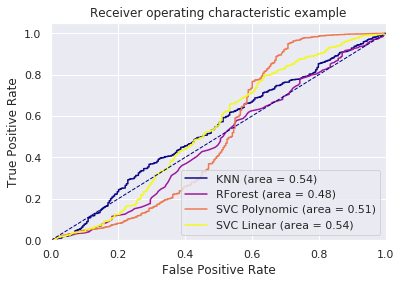

In [11]:
roc({"KNN": knn, "RForest": rf, 
     "SVC Linear": svc_linear,
     "SVC Polynomic": svc_poly})